# 3.0 Modeling and Evaluation

Owner: Diqing Wu (dwu2023@ischool.berkeley.edu)

**Note:** This is a dynamic notebook, which was reused when we run different trials (with/without tuning, 80%/90% PCA, etc). Outputs may change based on trial parameters (PCA features, hyperparameters, etc.), so the outputs within the notebook may not come from a same trial. Some code blocks do not have outputs as they were compiled from other notebooks. The report/presentation contains the definitive results.

This notebook focuses on extracting raw features from image data and assembling them into a pandas dataframe, laying the groundwork for further analysis in subsequent stages of the project.

- **Setup**: Initial setup including library imports and environment configuration.
- **Data Loading**: Importing PCA features for modeling
- **Training, Hyperparameter Tuning and Evaluation**: Each model is first trained and evaluated on default hyperparameter settings. Hyperparameters are then tuned using Optuna and evaluated using the optimal settings.

## Setup

In [ ]:
!pip install optuna --quiet

In [ ]:
import time
import gzip
import pickle
import joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [ ]:
pickle_file_path = '/content/drive/MyDrive/PneumoniaCXR-AIDetect/data/features_PCA/'

# if we want to run on PCA 80% explained variance features, use the commented code below
"""
X_train_feature_reduction = pd.read_pickle(pickle_file_path+'X_train_feature_reduction_80.pickle')
X_test_feature_reduction = pd.read_pickle(pickle_file_path+'X_test_feature_reduction_80.pickle')
X_val_feature_reduction = pd.read_pickle(pickle_file_path+'X_val_feature_reduction_80.pickle')

y_train = pd.read_pickle(pickle_file_path+"y_train_80.pickle")
y_test = pd.read_pickle(pickle_file_path+"y_test_80.pickle")
y_val = pd.read_pickle(pickle_file_path+"y_val_80.pickle")
"""

X_train_feature_reduction = pd.read_pickle(pickle_file_path+'X_train_feature_reduction_90.pickle')
X_test_feature_reduction = pd.read_pickle(pickle_file_path+'X_test_feature_reduction_90.pickle')
X_val_feature_reduction = pd.read_pickle(pickle_file_path+'X_val_feature_reduction_90.pickle')

y_train = pd.read_pickle(pickle_file_path+"y_train_90.pickle")
y_test = pd.read_pickle(pickle_file_path+"y_test_90.pickle")
y_val = pd.read_pickle(pickle_file_path+"y_val_90.pickle")

## Random Forest

Training Time Used: 86.03200721740723s
Training Accuracy: 0.9203776707061858
Predict Time Used: 0.530893087387085
Predict Time Used: 0.11976385116577148s
Val Accuracy: 0.8049065420560748
Prediction Time Used: 0.15486836433410645s
Test Accuracy: 0.8214953271028037


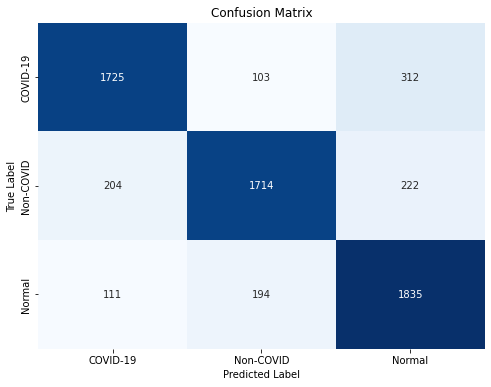

              precision    recall  f1-score   support

    COVID-19       0.95      0.92      0.93      6849
   Non-COVID       0.96      0.87      0.91      6849
      Normal       0.84      0.94      0.89      6849

    accuracy                           0.91     20547
   macro avg       0.91      0.91      0.91     20547
weighted avg       0.91      0.91      0.91     20547

              precision    recall  f1-score   support

    COVID-19       0.82      0.81      0.81      1712
   Non-COVID       0.86      0.76      0.81      1712
      Normal       0.75      0.84      0.79      1712

    accuracy                           0.80      5136
   macro avg       0.81      0.80      0.81      5136
weighted avg       0.81      0.80      0.81      5136

              precision    recall  f1-score   support

    COVID-19       0.85      0.81      0.83      2140
   Non-COVID       0.85      0.80      0.83      2140
      Normal       0.77      0.86      0.81      2140

    accuracy        

In [ ]:
# @title No hyperparameter tuning
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    criterion='entropy',
    min_samples_split=5,
    random_state=42
)

# Record the current time before executing the code
start_time = time.time()
# Training the classifier
rf_classifier.fit(X_train_feature_reduction, y_train)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Training Time Used: ' + str(elapsed_time) + 's')

# Calculating accuracy
accuracy = accuracy_score(y_train, y_train_pred_rf)
print("Training Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_train_pred_rf= rf_classifier.predict(X_train_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Record the current time before executing the code
start_time = time.time()
# Predicting on the val set
y_val_pred_rf = rf_classifier.predict(X_val_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time) + 's')

# Calculating accuracy
accuracy = accuracy_score(y_val, y_val_pred_rf)
print("Val Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_test_pred_rf = rf_classifier.predict(X_test_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Prediction Time Used: ' + str(elapsed_time) + 's')

# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred_rf)
print("Test Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred_rf)

# Define class labels
classes = np.unique(y_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_train, y_train_pred_rf))
print(classification_report(y_val, y_val_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

[I 2024-04-12 14:52:07,023] A new study created in memory with name: no-name-4a8a3ffe-871e-4a8e-bfbc-578a6186fc8b
[I 2024-04-12 14:52:17,310] Trial 0 finished with value: 0.7815420560747663 and parameters: {'n_estimators': 50, 'max_depth': 5, 'criterion': 'gini', 'min_samples_split': 2}. Best is trial 0 with value: 0.7815420560747663.
[I 2024-04-12 14:53:21,849] Trial 1 finished with value: 0.7856308411214953 and parameters: {'n_estimators': 200, 'max_depth': 5, 'criterion': 'entropy', 'min_samples_split': 2}. Best is trial 1 with value: 0.7856308411214953.
[I 2024-04-12 14:53:53,779] Trial 2 finished with value: 0.7860202492211839 and parameters: {'n_estimators': 100, 'max_depth': 5, 'criterion': 'entropy', 'min_samples_split': 5}. Best is trial 2 with value: 0.7860202492211839.
[I 2024-04-12 14:54:25,924] Trial 3 finished with value: 0.7860202492211839 and parameters: {'n_estimators': 100, 'max_depth': 5, 'criterion': 'entropy', 'min_samples_split': 5}. Best is trial 2 with value: 0.

Optimization Time Used: 1335.9706749916077s
Training Time Used: 116.9215350151062s
Predict Time Used: 0.597538948059082
Training Time Used: -0.0003170967102050781s
Val Accuracy: 0.8115264797507789
Prediction Time Used: 1.5735626220703125e-05s
Test Accuracy: 0.8182242990654206


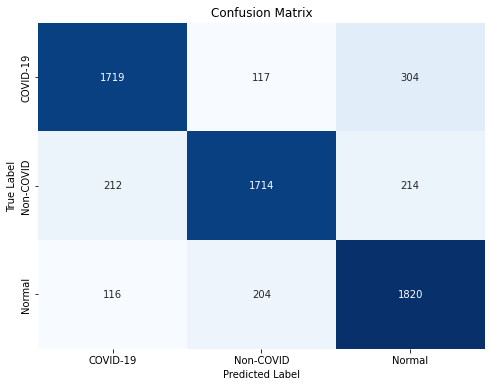

              precision    recall  f1-score   support

    COVID-19       0.84      0.80      0.82      2140
   Non-COVID       0.84      0.80      0.82      2140
      Normal       0.78      0.85      0.81      2140

    accuracy                           0.82      6420
   macro avg       0.82      0.82      0.82      6420
weighted avg       0.82      0.82      0.82      6420



In [ ]:
# @title With hyperparameter tuning
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_categorical('n_estimators', [50, 100, 200])
    max_depth = trial.suggest_categorical('max_depth', [5, 10])
    criterion = trial.suggest_categorical('criterion', ["gini", "entropy"])
    min_samples_split = trial.suggest_categorical('min_samples_split', [2, 5])

    # Create and train the Random Forest model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        criterion=criterion,
        min_samples_split=min_samples_split,
        random_state=42
    )

    model.fit(X_train_feature_reduction, y_train)

    # Calculate the accuracy on the validation set
    y_pred = model.predict(X_val_feature_reduction)
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy

# Record the current time before executing the code
start_time = time.time()
# Define the study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Optimization Time Used: ' + str(elapsed_time)+'s')

# Get the best trial's hyperparameters
best_trial = study.best_trial
best_params = best_trial.params
rf_classifier = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    criterion=best_params['criterion'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Record the current time before executing the code
start_time = time.time()
# Training the classifier
rf_classifier.fit(X_train_feature_reduction, y_train)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Training Time Used: ' + str(elapsed_time) + 's')

# Calculating accuracy
accuracy = accuracy_score(y_train, y_train_pred_rf)
print("Training Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_train_pred_rf= rf_classifier.predict(X_train_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Record the current time before executing the code
start_time = time.time()
# Predicting on the val set
y_val_pred_rf = rf_classifier.predict(X_val_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time) + 's')

# Calculating accuracy
accuracy = accuracy_score(y_val, y_val_pred_rf)
print("Val Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_test_pred_rf = rf_classifier.predict(X_test_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Prediction Time Used: ' + str(elapsed_time) + 's')

# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred_rf)
print("Test Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred_rf)

# Define class labels
classes = np.unique(y_test)  # Update with your class labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_train, y_train_pred_rf))
print(classification_report(y_val, y_val_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

In [ ]:
# @title Get feature importances and summary statistics for feature importance
# Get feature importances
feature_names_importances = [f"hog_{i}" for i in range(1065)] + [f"radio_{i}" for i in range(22)] + [f"resnet_{i}" for i in range(193)]
feature_importances = rf_classifier.feature_importances_
# Get the indices of feature importances sorted in descending order
indices_sorted = np.argsort(feature_importances)[::-1]

# Create DataFrame to store feature importances
feature_importances_df = pd.DataFrame(data=feature_importances, index=feature_names_importances, columns=['importance'])

# Sort DataFrame by importance values in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

feature_importances_df.head(10)
feature_importances_df.to_csv('feature_importances.csv')

# hog importance, sum and avg
print(np.sum(feature_importances[:1065]))
print(np.sum(feature_importances[:1065]/1065))

# resnet importance, sum and avg
print(np.sum(feature_importances[-193:]))
print(np.sum(feature_importances[-193:]/193))

# radiomic importance, sum and avg
print(np.sum(feature_importances[1065:-193]))
print(np.sum(feature_importances[1065:-193]/22))

In [ ]:
# @title Export model
filename = 'rf_90.pkl'
joblib.dump(rf_classifier, filename)

['rf_90.pkl']

## SVM

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1410.822206, rho = -0.184865
nSV = 2000, nBSV = 2000
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1554.229205, rho = -0.099198
nSV = 2000, nBSV = 2000
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1622.724075, rho = -0.095780
nSV = 2000, nBSV = 2000
Total nSV = 5016
Training Time Used: 14.044706583023071


/Users/wudiqing/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Predict Time Used: 31.367276191711426
Training Accuracy: 0.9609188689346376
Prediction Time Used: 7.920851945877075
Val Accuracy: 0.8691588785046729
Prediction Time Used: 9.923810243606567
Test Accuracy: 0.8808411214953271


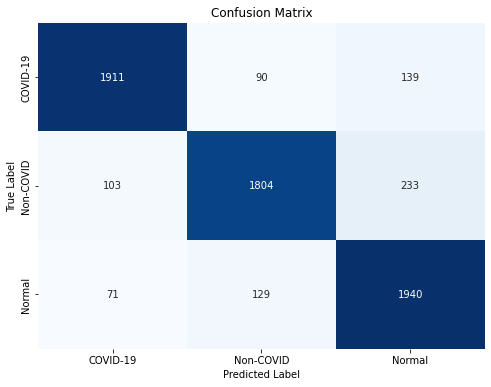

              precision    recall  f1-score   support

    COVID-19       0.98      0.99      0.99      6849
   Non-COVID       0.97      0.92      0.95      6849
      Normal       0.93      0.97      0.95      6849

    accuracy                           0.96     20547
   macro avg       0.96      0.96      0.96     20547
weighted avg       0.96      0.96      0.96     20547

              precision    recall  f1-score   support

    COVID-19       0.92      0.91      0.92      1712
   Non-COVID       0.88      0.81      0.85      1712
      Normal       0.81      0.88      0.84      1712

    accuracy                           0.87      5136
   macro avg       0.87      0.87      0.87      5136
weighted avg       0.87      0.87      0.87      5136

              precision    recall  f1-score   support

    COVID-19       0.92      0.89      0.90      2140
   Non-COVID       0.89      0.84      0.87      2140
      Normal       0.84      0.91      0.87      2140

    accuracy        

In [ ]:
# @title No hyperparameter tuning
svm_classifier = SVC(C=1.0, kernel='rbf', max_iter = 1000, random_state=42, verbose=2)

# Record the current time before executing the code
start_time = time.time()
# Training the classifier
svm_classifier.fit(X_train_feature_reduction, y_train)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Training Time Used: ' + str(elapsed_time))


# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_train_pred_svm = svm_classifier.predict(X_train_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_train, y_train_pred_svm)
print("Training Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the val set
y_val_pred_svm = svm_classifier.predict(X_val_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Prediction Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_val, y_val_pred_svm)
print("Val Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_test_pred_svm = svm_classifier.predict(X_test_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Prediction Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred_svm)
print("Test Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred_svm)

# Define class labels
classes = np.unique(y_test)  # Update with your class labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_train, y_train_pred_svm))
print(classification_report(y_val, y_val_pred_svm))
print(classification_report(y_test, y_test_pred_svm))

/Users/wudiqing/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Time Used: 15.11056399345398
Predict Time Used: 19.103893041610718
Training Accuracy: 0.7039470482308853
Prediction Time Used: 4.795391082763672
Val Accuracy: 0.7098909657320872
Prediction Time Used: 6.012643814086914
Test Accuracy: 0.6845794392523364


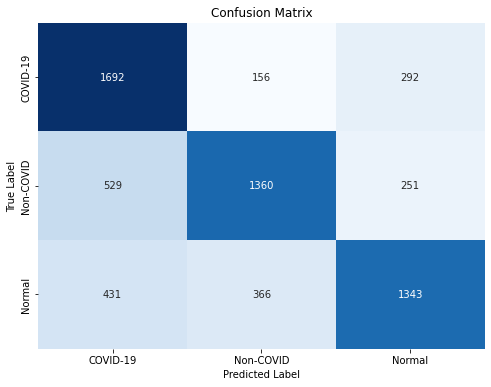

              precision    recall  f1-score   support

    COVID-19       0.68      0.83      0.75      6849
   Non-COVID       0.72      0.62      0.66      6849
      Normal       0.72      0.66      0.69      6849

    accuracy                           0.70     20547
   macro avg       0.71      0.70      0.70     20547
weighted avg       0.71      0.70      0.70     20547

              precision    recall  f1-score   support

    COVID-19       0.68      0.81      0.74      1712
   Non-COVID       0.73      0.64      0.68      1712
      Normal       0.74      0.68      0.71      1712

    accuracy                           0.71      5136
   macro avg       0.71      0.71      0.71      5136
weighted avg       0.71      0.71      0.71      5136

              precision    recall  f1-score   support

    COVID-19       0.64      0.79      0.71      2140
   Non-COVID       0.72      0.64      0.68      2140
      Normal       0.71      0.63      0.67      2140

    accuracy        

In [ ]:
# @title With hyperparameter tuning
# Define objective function for optimization
def objective(trial):
    # Define hyperparameters to be tuned
    C = trial.suggest_categorical('C', [1e-4, 1, 1e2])
    kernel = trial.suggest_categorical('kernel', ['linear', 'sigmoid', 'rbf'])
    gamma = trial.suggest_categorical('gamma', [1e-5, 1e-1, 10]) if kernel in ['sigmoid', 'rbf'] else 'scale'

    # Instantiate SVM model with hyperparameters
    model = SVC(C=C, kernel=kernel, gamma=gamma, max_iter = 1000, random_state=42, verbose=2)

    # Train model
    model.fit(X_train_feature_reduction, y_train)

    # Calculate the accuracy on the validation set
    y_pred = model.predict(X_val_feature_reduction)
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy
# Record the current time before executing the code
start_time = time.time()
# Define the study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Optimization Time Used: ' + str(elapsed_time))

# Get the best trial's hyperparameters
best_trial = study.best_trial
best_params = best_trial.params
svm_classifier = SVC(
    C=best_params['C'],
    kernel=best_params['kernel'],
    gamma=best_params['gamma'],
    max_iter = 1000,
    random_state=42
)

# Record the current time before executing the code
start_time = time.time()
# Training the classifier
svm_classifier.fit(X_train_feature_reduction, y_train)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Training Time Used: ' + str(elapsed_time))


# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_train_pred_svm = svm_classifier.predict(X_train_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_train, y_train_pred_svm)
print("Training Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the val set
y_val_pred_svm = svm_classifier.predict(X_val_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Prediction Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_val, y_val_pred_svm)
print("Val Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_test_pred_svm = svm_classifier.predict(X_test_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Prediction Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred_svm)
print("Test Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred_svm)

# Define class labels
classes = np.unique(y_test)  # Update with your class labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_train, y_train_pred_svm))
print(classification_report(y_val, y_val_pred_svm))
print(classification_report(y_test, y_test_pred_svm))

In [ ]:
# @title Export model
filename = 'svm_90.pkl'
joblib.dump(svm_classifier, filename)

['svm_90.pkl']

## Logistic Regression

Training Time Used: 8.55466103553772
Predict Time Used: 0.013206243515014648
Training Accuracy: 0.8788630943690077
Predict Time Used: 0.005229949951171875
Val Accuracy: 0.8666277258566978
Predict Time Used: 0.00385284423828125
Test Accuracy: 0.8814641744548286


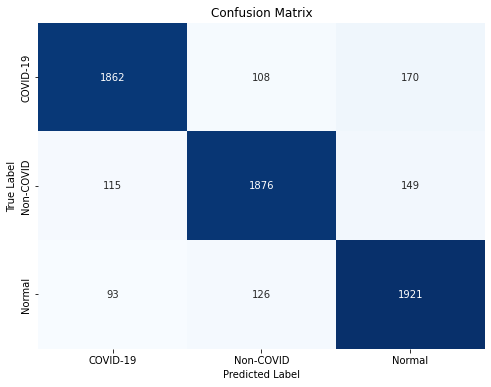

              precision    recall  f1-score   support

    COVID-19       0.91      0.90      0.91      6849
   Non-COVID       0.89      0.84      0.87      6849
      Normal       0.84      0.89      0.86      6849

    accuracy                           0.88     20547
   macro avg       0.88      0.88      0.88     20547
weighted avg       0.88      0.88      0.88     20547

              precision    recall  f1-score   support

    COVID-19       0.90      0.88      0.89      1712
   Non-COVID       0.88      0.84      0.86      1712
      Normal       0.83      0.87      0.85      1712

    accuracy                           0.87      5136
   macro avg       0.87      0.87      0.87      5136
weighted avg       0.87      0.87      0.87      5136

              precision    recall  f1-score   support

    COVID-19       0.90      0.87      0.88      2140
   Non-COVID       0.89      0.88      0.88      2140
      Normal       0.86      0.90      0.88      2140

    accuracy        

In [ ]:
# @title No hyperparameter tuning
logistic_model = LogisticRegression(
    C=0.1,
    penalty='l1',
    solver='liblinear',
    random_state=42
)

# Record the current time before executing the code
start_time = time.time()
# Training the model
logistic_model.fit(X_train_feature_reduction, y_train)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Training Time Used: ' + str(elapsed_time))

# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_train_pred_logistic = logistic_model.predict(X_train_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_train, y_train_pred_logistic)
print("Training Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the val set
y_val_pred_logistic = logistic_model.predict(X_val_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_val, y_val_pred_logistic)
print("Val Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_test_pred_logistic = logistic_model.predict(X_test_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred_logistic)
print("Test Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred_logistic)

# Define class labels
classes = np.unique(y_test)  # Update with your class labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(classification_report(y_train, y_train_pred_logistic))
print(classification_report(y_val, y_val_pred_logistic))
print(classification_report(y_test, y_test_pred_logistic))

[I 2024-04-17 06:12:58,655] A new study created in memory with name: no-name-f6e5b1fc-f1be-4d72-b261-a7624d8de39d
<ipython-input-10-bac7ca34d618>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.01, 10.0)
[I 2024-04-17 06:13:44,817] Trial 0 finished with value: 0.8637071651090342 and parameters: {'C': 0.013611245197792539, 'penalty': 'l2'}. Best is trial 0 with value: 0.8637071651090342.
<ipython-input-10-bac7ca34d618>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.01, 10.0)
[I 2024-04-17 06:14:37,470] Trial 1 finished with value: 0.8639018691588785 and parameters: {'C': 0.016899421943408235, 'pen

Optimization Time Used: 238.426593542099
Training Time Used: 32.80454993247986
Predict Time Used: 0.25056886672973633
Training Accuracy: 0.8785224120309534
Predict Time Used: 0.021364927291870117
Val Accuracy: 0.8644859813084113
Predict Time Used: 0.1254439353942871
Test Accuracy: 0.8805295950155764


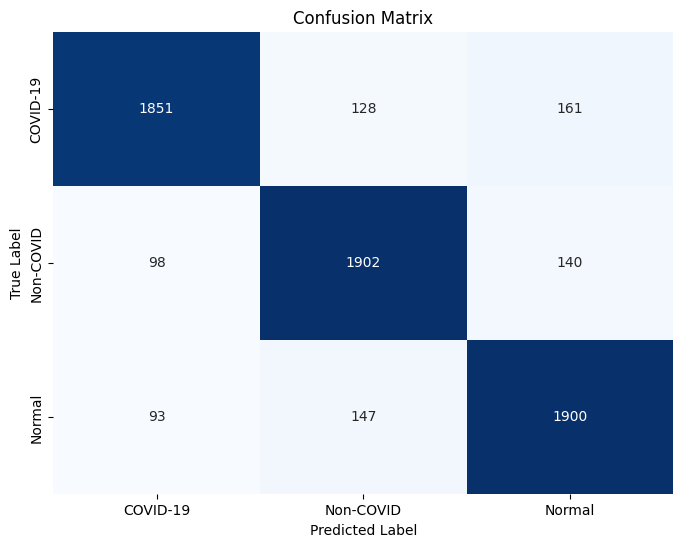

              precision    recall  f1-score   support

    COVID-19       0.91      0.91      0.91      6849
   Non-COVID       0.89      0.84      0.87      6849
      Normal       0.84      0.89      0.86      6849

    accuracy                           0.88     20547
   macro avg       0.88      0.88      0.88     20547
weighted avg       0.88      0.88      0.88     20547

              precision    recall  f1-score   support

    COVID-19       0.89      0.88      0.89      1712
   Non-COVID       0.87      0.84      0.86      1712
      Normal       0.83      0.87      0.85      1712

    accuracy                           0.86      5136
   macro avg       0.87      0.86      0.86      5136
weighted avg       0.87      0.86      0.86      5136

              precision    recall  f1-score   support

    COVID-19       0.91      0.86      0.89      2140
   Non-COVID       0.87      0.89      0.88      2140
      Normal       0.86      0.89      0.88      2140

    accuracy        

In [ ]:
# @title With hyperparameter tuning
def objective(trial):
    # Define the hyperparameters to tune
    C = trial.suggest_loguniform('C', 0.01, 10.0)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])

    # Create and train the Logistic Regression model
    model = LogisticRegression(C=C, penalty=penalty, solver='liblinear', random_state=42)
    model.fit(X_train_feature_reduction, y_train)

    # Calculate the accuracy on the validation set
    y_pred = model.predict(X_val_feature_reduction)
    accuracy = accuracy_score(y_val, y_pred)
    del model
    return accuracy

# Record the current time before executing the code
start_time = time.time()
# Define the study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=6)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Optimization Time Used: ' + str(elapsed_time))

# Get the best trial's hyperparameters
best_trial = study.best_trial
best_params = best_trial.params
logistic_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver='liblinear',
    random_state=42
)

# Record the current time before executing the code
start_time = time.time()
# Training the model
logistic_model.fit(X_train_feature_reduction, y_train)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Training Time Used: ' + str(elapsed_time))

# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_train_pred_logistic = logistic_model.predict(X_train_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_train, y_train_pred_logistic)
print("Training Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the val set
y_val_pred_logistic = logistic_model.predict(X_val_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_val, y_val_pred_logistic)
print("Val Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_test_pred_logistic = logistic_model.predict(X_test_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred_logistic)
print("Test Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred_logistic)

# Define class labels
classes = np.unique(y_test)  # Update with your class labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(classification_report(y_train, y_train_pred_logistic))
print(classification_report(y_val, y_val_pred_logistic))
print(classification_report(y_test, y_test_pred_logistic))

In [ ]:
# @title Export model
# Save the model to a file
filename = 'logistic_90.pkl'
joblib.dump(logistic_model, filename)

## Gradient Boosting Classifier

      Iter       Train Loss   Remaining Time 
         1           1.0377           18.34m
         2           0.9873           18.21m
         3           0.9441           17.98m
         4           0.9075           17.80m
         5           0.8765           17.63m
         6           0.8487           17.42m
         7           0.8243           17.25m
         8           0.8018           17.06m
         9           0.7814           16.87m
        10           0.7641           16.69m
        11           0.7477           16.53m
        12           0.7312           16.38m
        13           0.7180           16.20m
        14           0.7045           16.01m
        15           0.6931           15.82m
        16           0.6819           15.62m
        17           0.6711           15.44m
        18           0.6616           15.25m
        19           0.6528           15.07m
        20           0.6445           14.88m
        21           0.6357           14.69m
        2

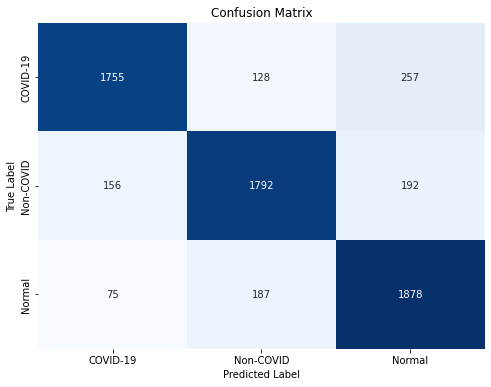

              precision    recall  f1-score   support

    COVID-19       0.89      0.87      0.88      6849
   Non-COVID       0.88      0.82      0.85      6849
      Normal       0.81      0.88      0.85      6849

    accuracy                           0.86     20547
   macro avg       0.86      0.86      0.86     20547
weighted avg       0.86      0.86      0.86     20547

              precision    recall  f1-score   support

    COVID-19       0.87      0.85      0.86      1712
   Non-COVID       0.86      0.82      0.84      1712
      Normal       0.80      0.86      0.83      1712

    accuracy                           0.84      5136
   macro avg       0.84      0.84      0.84      5136
weighted avg       0.84      0.84      0.84      5136

              precision    recall  f1-score   support

    COVID-19       0.88      0.82      0.85      2140
   Non-COVID       0.85      0.84      0.84      2140
      Normal       0.81      0.88      0.84      2140

    accuracy        

In [ ]:
# @title No hyperparameter tuning
gbm_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0,
                                   random_state=42,verbose=2)

# Record the current time before executing the code
start_time = time.time()
# Training the model
gbm_model.fit(X_train_feature_reduction, y_train)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Training Time Used: ' + str(elapsed_time))

# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_train_pred_gbm = gbm_model.predict(X_train_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_train, y_train_pred_gbm)
print("Training Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the val set
y_val_pred_gbm = gbm_model.predict(X_val_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_val, y_val_pred_gbm)
print("Val Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_test_pred_gbm = gbm_model.predict(X_test_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred_gbm)
print("Test Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred_gbm)

# Define class labels
classes = np.unique(y_test)  # Update with your class labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_train, y_train_pred_gbm))
print(classification_report(y_val, y_val_pred_gbm))
print(classification_report(y_test, y_test_pred_gbm))

In [ ]:
# @title With hyperparameter tuning
def objective(trial):
    # Define the search space for hyperparameters
    params = {
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01, 0.05, 0.1]),
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 200]),
        'subsample': trial.suggest_categorical('subsample', [0.5, 1.0]),
    }

    # Train the GBM model
    model = GradientBoostingClassifier(**params)
    model.fit(X_train_feature_reduction, y_train)

    # Evaluate the model on the validation set
    y_pred = model.predict(X_val_feature_reduction)
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy

# Record the current time before executing the code
start_time = time.time()
# Create the study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Optimization Time Used: ' + str(elapsed_time))

# Get the best hyperparameters and best accuracy
best_trial = study.best_trial
best_params = best_trial.params
best_accuracy = best_trial.value

gbm_model = GradientBoostingClassifier(
    n_estimators = best_params['n_estimators'],
    learning_rate = best_params['learning_rate'],
    subsample = best_params['subsample'],
    random_state=42,
    verbose=2
)

# Record the current time before executing the code
start_time = time.time()
# Training the model
gbm_model.fit(X_train_feature_reduction, y_train)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Training Time Used: ' + str(elapsed_time))

# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_train_pred_gbm = gbm_model.predict(X_train_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_train, y_train_pred_gbm)
print("Training Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the val set
y_val_pred_gbm = gbm_model.predict(X_val_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_val, y_val_pred_gbm)
print("Val Accuracy:", accuracy)

# Record the current time before executing the code
start_time = time.time()
# Predicting on the test set
y_test_pred_gbm = gbm_model.predict(X_test_feature_reduction)
# Record the current time after executing the code
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Predict Time Used: ' + str(elapsed_time))

# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred_gbm)
print("Test Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred_gbm)

# Define class labels
classes = np.unique(y_test)  # Update with your class labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_train, y_train_pred_gbm))
print(classification_report(y_val, y_val_pred_gbm))
print(classification_report(y_test, y_test_pred_gbm))

In [ ]:
# @title Export model
filename = 'gbm_90.pkl'
joblib.dump(gbm_model, filename)

## Find Misclassified Examples

In [ ]:
misclassify = (y_test != y_test_pred_logistic)
idx_misclassify = misclassify.index[misclassify]
print(len(idx_misclassify))

In [ ]:
idx = idx_misclassify[670]
print("true label: "+y_test[idx])
print("misclassified as: "+y_test_pred_logistic[idx])
img_misclassified = raw_features_test['image_processed'][idx]
print(np.shape(img_misclassified))
plt.imshow(img_misclassified, cmap='gray')
plt.axis('off')
plt.show()